In [ ]:
!pip install google-search-results
import requests
import numpy as np
import pandas as pd
import cv2
import dlib
import matplotlib.pyplot as plt
import networkx as nx
from serpapi import GoogleSearch

  Preparing metadata (setup.py) ... done
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32004 sha256=0f73091b883134719c730174325f9e8742bfb57c1139901334f8905d3a2f1f52
  Stored in directory: /root/.cache/pip/wheels/d3/b2/c3/03302d12bb44a2cdff3c9371f31b72c0c4e84b8d2285eeac53
Successfully built google-search-results


In [ ]:
par = {
    "q": "site:https://www.realme.com/eg/ realme Phones",
    "engine": "google",
    "api_key":"e2b6700326dfec9b98b039c2361c7a9cb6e46a3fa7c637a978b70dd36dc51bf0",
    "gl": "eg"
}
search = GoogleSearch(par)
results = search.get_dict()
res = results["organic_results"]
for i in range(len(res)):
  print(res[i]["link"])

https://www.realme.com/eg/
https://www.realme.com/eg/realme-12-pro-official
https://www.realme.com/eg/realme-9i/specs
https://www.realme.com/eg/realme-ui
https://www.realme.com/eg/support
https://www.realme.com/eg/realme2-pro
https://www.realme.com/eg/realme-c53
https://www.realme.com/eg/newsroom/realme-200529
https://www.realme.com/eg/support/phonecheck
https://www.realme.com/eg/realme-c55/specs


In [ ]:
dictoflinks={
    "realme":"https://www.realme.com/eg/",
    "realme 12 pro":"https://www.realme.com/eg/realme-12-pro-official",
    "realme 9i":"https://www.realme.com/eg/realme-9i/specs",
    "realme ui":"https://www.realme.com/eg/realme-ui",
    "support":"https://www.realme.com/eg/support",
    "realme 2 pro":"https://www.realme.com/eg/realme2-pro",
    "realme c53":"https://www.realme.com/eg/realme-c53",
    "support phone check":"https://www.realme.com/eg/support/phonecheck",
    "realme c55":"https://www.realme.com/eg/realme-c55/specs",
    "support spare parts price":"https://www.realme.com/eg/support/spare-parts-price"
}

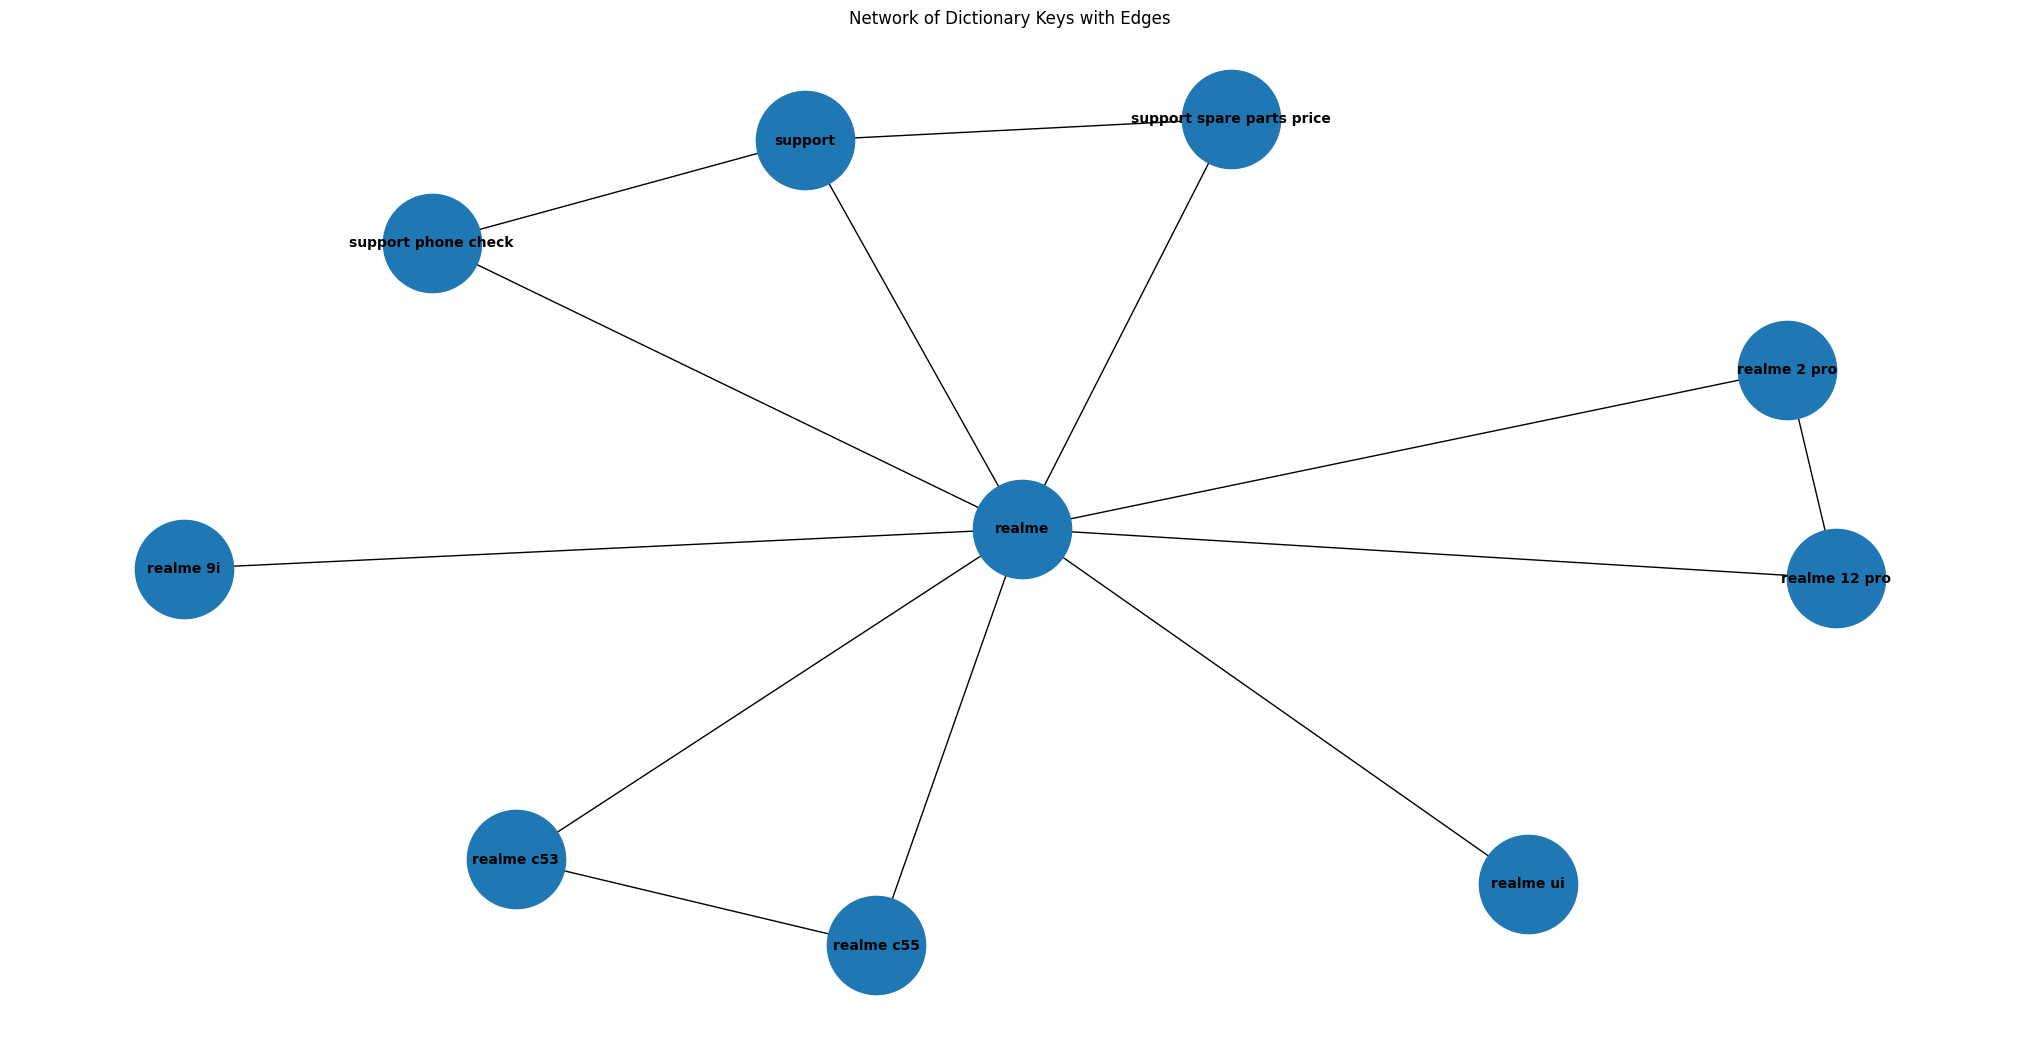

In [ ]:
G = nx.Graph()


G.add_nodes_from(dictoflinks.keys())

for key in dictoflinks.keys():
    if key != "realme":
        G.add_edge("realme", key)


G.add_node("realme")
G.add_edge("realme", "realme 12 pro")
G.add_edge("realme", "realme 9i")
G.add_edge("realme", "realme ui")
G.add_edge("realme", "support")
G.add_edge("realme","realme 2 pro" )
G.add_edge("realme","realme c53" )
G.add_edge("support","support phone check")
G.add_edge("realme","realme c55")
G.add_edge("support","support spare parts price")
G.add_edge("realme c55","realme c53")
G.add_edge("realme 12 pro","realme 2 pro")
#==============================================================
# G.add_edge("support phone check","realme 9i")
# G.add_edge("support phone check","realme c53")
# G.add_edge("support phone check","realme c55")
# G.add_edge("support phone check","realme 2 pro")
# G.add_edge("support phone check","realme 12 pro")
# G.add_edge("support phone check","support spare parts price")


plt.figure(figsize=(20, 10))
nx.draw(G, with_labels=True, node_size=5000, font_size=10, font_weight='bold')
plt.title("Network of Dictionary Keys with Edges")
plt.show()

In [ ]:
for node in G.nodes:
    degree = G.degree(node)
    print("Node:", node, ", Degree is:", degree)

Node: realme , Degree is: 9
Node: realme 12 pro , Degree is: 2
Node: realme 9i , Degree is: 1
Node: realme ui , Degree is: 1
Node: support , Degree is: 3
Node: realme 2 pro , Degree is: 2
Node: realme c53 , Degree is: 2
Node: support phone check , Degree is: 2
Node: realme c55 , Degree is: 2
Node: support spare parts price , Degree is: 2


In [ ]:
a=nx.betweenness_centrality(G,normalized=False)
print(a)

{'realme': 31.5, 'realme 12 pro': 0.0, 'realme 9i': 0.0, 'realme ui': 0.0, 'support': 0.5, 'realme 2 pro': 0.0, 'realme c53': 0.0, 'support phone check': 0.0, 'realme c55': 0.0, 'support spare parts price': 0.0}


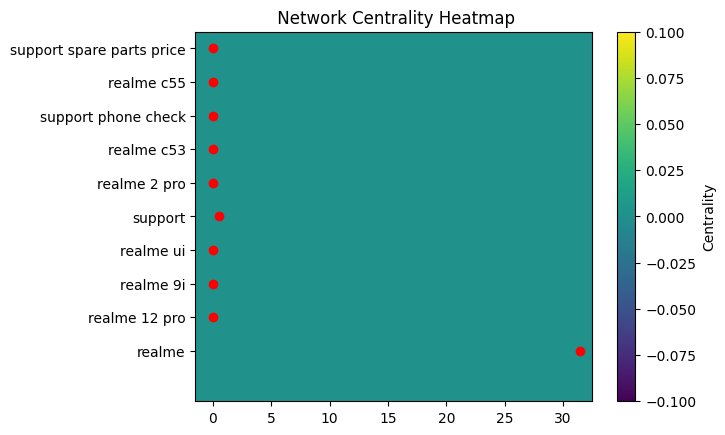

In [ ]:
#code for the non commented network (metrateba) which is runned
import numpy as np
import matplotlib.pyplot as plt
import math
nodes= list(dictoflinks.keys())
x = list(a.values())
y = list(range(len(nodes)))
grid_size=1
h=1
x_max=max (x)
x_min=min(x)
y_min=min (y)
y_max=max (y)
x_grid=np.arange(x_min-h,x_max+h,grid_size)
y_grid=np. arange(y_min-h,y_max+h,grid_size)
x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)
xc=x_mesh+(grid_size/2)
yc=y_mesh+(grid_size/2)
def kde_quartic(d,h):
    dn=d/h
    P=(15/16)*(1-dn**2)**2
    return P
intensity_list=[]
for j in range(len(xc)):
   intensity_row=[]
   for k in range(len(xc[0])):
          kde_value_list=[]
          for i in range(len(x)):
             d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2)
             if d<=h:
               p=kde_quartic(d,h)
             else:
               p=0
               kde_value_list. append (p)
          P_total=sum(kde_value_list)
          intensity_row.append(P_total)
   intensity_list.append(intensity_row)
intensity=np.array(intensity_list)
plt. pcolormesh(x_mesh,y_mesh, intensity)
plt.plot(x,y, 'ro')
plt.colorbar(label="Centrality")
plt.title(" Network Centrality Heatmap")
plt.yticks(range(len(nodes)), nodes)
plt.show ()



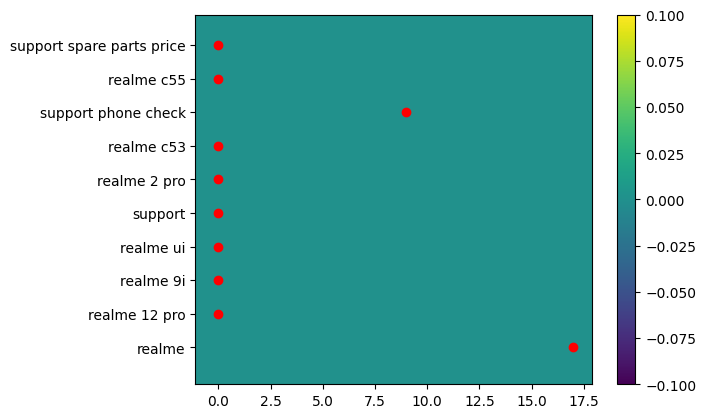

In [ ]:
# #code for the commented network (metla5bata)
# nodes= list(dictoflinks.keys())
# x = list(a.values())
# y = list(range(len(nodes)))
# grid_size=1
# h=0.6
# x_max=max (x)
# x_min=min(x)
# y_min=min (y)
# y_max=max (y)
# #CONSTRUCT GRID
# x_grid=np.arange(x_min-h,x_max+h,grid_size)
# y_grid=np. arange(y_min-h,y_max+h,grid_size)
# x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)
# #GRID CENTER POINT xc=X_mesh+(grid_size/2)
# xc=x_mesh+(grid_size/2)
# yc=y_mesh+(grid_size/2)
# def kde_quartic(d,h):
#     dn=d/h
#     P=(15/16)*(1-dn**2)**2
#     return P
# #PROCESSING
# intensity_list=[]
# for j in range(len(xc)):
#    intensity_row=[]
#    for k in range(len(xc[0])):
#           kde_value_list=[]
#           for i in range(len(x)):
#              d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2)
#              if d<=h:
#                p=kde_quartic(d,h)
#              else:
#                p=0
#                kde_value_list. append (p)
#           P_total=sum(kde_value_list)
#           intensity_row.append(P_total)
#    intensity_list.append(intensity_row)
# intensity=np.array(intensity_list)
# plt. pcolormesh(x_mesh,y_mesh, intensity)
# plt.plot(x,y, 'ro')
# plt.colorbar()
# plt.yticks(range(len(nodes)), nodes)
# plt.show ()

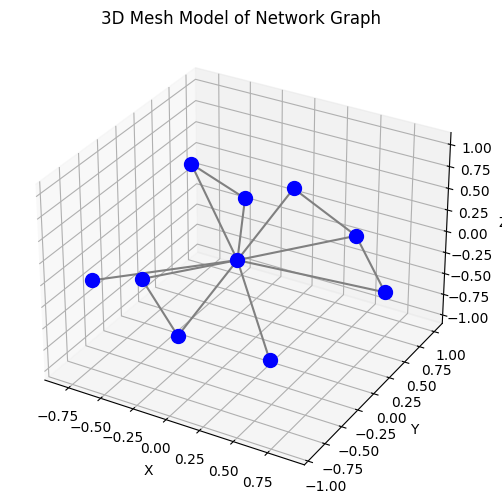

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d


mylist=["realme","realme 12 pro", "realme 9i","realme ui","support","realme 2 pro","realme c53","support phone check","realme c55","support spare parts price"]

G = nx.Graph()


G.add_nodes_from(mylist)
G.add_edges_from([("realme", "realme 12 pro"), ("realme", "realme 9i"), ("realme", "realme ui"), ("realme", "support"), ("realme","realme 2 pro"), ("realme","realme c53"),("support","support phone check"),("realme","realme c55"),("support","support spare parts price"),("realme c55","realme c53"),("realme 12 pro","realme 2 pro"),("realme","support phone check"),("realme","support spare parts price")])


fig = plt.figure(figsize=(8, 6))
ax = plt.axes(projection='3d')


node_pos = nx.spring_layout(G, dim=3)


for node, (x, y, z) in node_pos.items():
    ax.scatter(x, y, z, color='b', s=100)  # You can customize the size and color of the nodes


for edge in G.edges():
    start, end = edge
    x = [node_pos[start][0], node_pos[end][0]]
    y = [node_pos[start][1], node_pos[end][1]]
    z = [node_pos[start][2], node_pos[end][2]]
    ax.plot(x, y, z, color='gray')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Mesh Model of Network Graph')


plt.show()
